In [ ]:
# Importing the packages we will use in this project

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [ ]:
# reading in the data
df = pd.read_csv(r'/content/sample_data/movies.csv')
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [ ]:
# Going through data to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [ ]:
# As we have missing data in some columns, 
#for now we will drop the rows which have missing data

df = df.dropna()

In [ ]:
#looking again for missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 0%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%


In [ ]:
 # Checking Data Types for our columns

print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


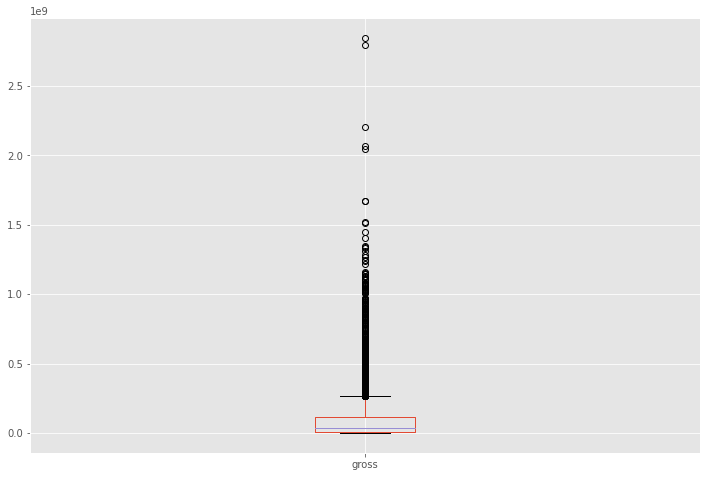

In [ ]:
# Checking if there are any Outliers?

df.boxplot(column=['gross'])

In [ ]:
# Dropping duplicates

df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0


In [ ]:
# Ordering Data to get a little overview

df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500.0,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000.0,5.073000e+03,Two Prong Lesson,96.0
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000.0,2.970000e+03,Trimark Pictures,97.0
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000.0,2.554000e+03,Copperheart Entertainment,108.0
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000.0,2.270000e+03,Embassy Pictures,85.0


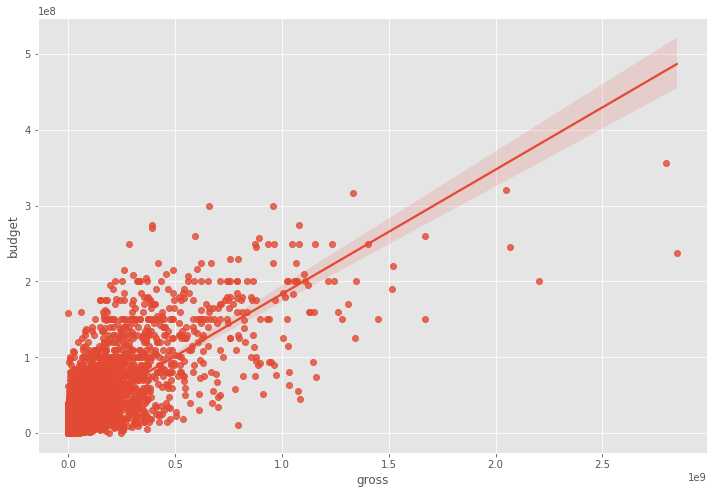

In [ ]:
# Plotting a graph showing realtion between budget and gross collection of a movie

sns.regplot(x="gross", y="budget", data=df)

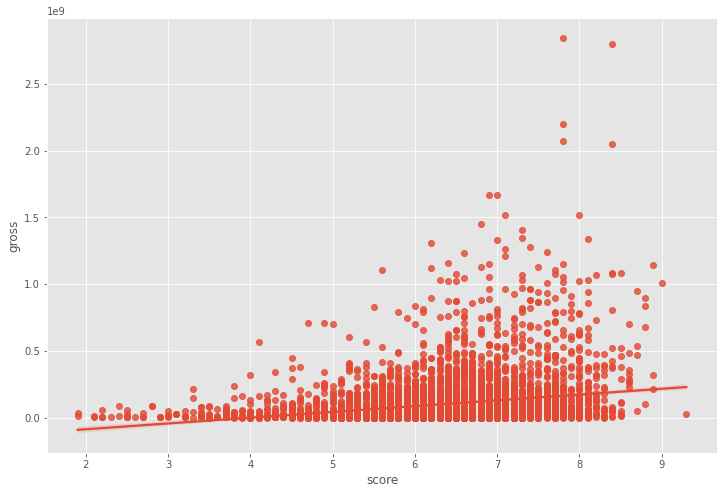

In [ ]:
# Plotting a graph showing realtion between score and gross collection of a movie

sns.regplot(x="score", y="gross", data=df)

In [ ]:
# Correlation Matrix between all numeric columns
'''correlation can be done with  3 methods -
pearson
kendall 
spearman 
the default method being pearson'''

df.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


In [ ]:
df.corr(method ='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


In [ ]:
df.corr(method ='kendall')


,year,score,votes,budget,gross,runtime
year,1.000000,0.039389,0.296512,0.220833,0.239539,0.064824
score,0.039389,1.000000,0.350185,-0.006406,0.124943,0.292254
votes,0.296512,0.350185,1.000000,0.346274,0.553625,0.205344
budget,0.220833,-0.006406,0.346274,1.000000,0.512057,0.231278
gross,0.239539,0.124943,0.553625,0.512057,1.000000,0.176979
runtime,0.064824,0.292254,0.205344,0.231278,0.176979,1.000000


In [ ]:
df.corr(method ='spearman')

,year,score,votes,budget,gross,runtime
year,1.000000,0.057741,0.427623,0.312886,0.351045,0.095444
score,0.057741,1.000000,0.495409,-0.009971,0.183192,0.412155
votes,0.427623,0.495409,1.000000,0.493461,0.745793,0.300621
budget,0.312886,-0.009971,0.493461,1.000000,0.692958,0.330794
gross,0.351045,0.183192,0.745793,0.692958,1.000000,0.257400
runtime,0.095444,0.412155,0.300621,0.330794,0.257400,1.000000


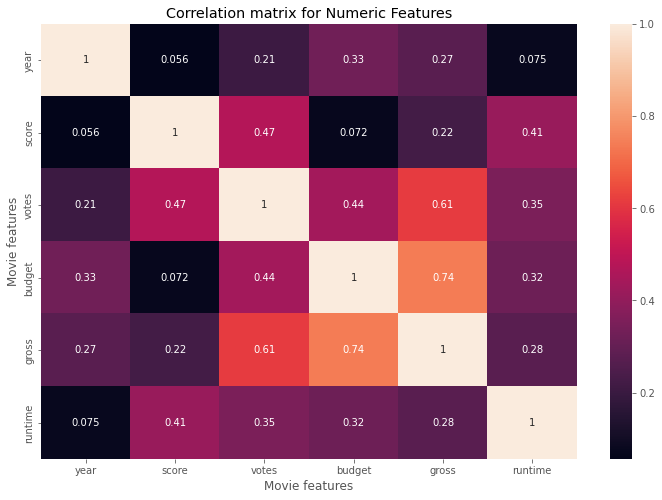

In [ ]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [ ]:
# Using factorize - this assigns a random numeric value for each unique categorical value

df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,0.169808,0.028413,0.965461,0.966086,-0.020083,0.297305,0.725411,0.791872,0.695124,0.098110,0.288955,0.967925,0.535369,0.048980
rating,0.169808,1.000000,-0.116507,0.179456,0.171063,0.036114,0.097619,0.096014,0.128909,0.115694,-0.004547,0.203698,0.172703,-0.026286,0.032265
genre,0.028413,-0.116507,1.000000,0.031765,0.031251,-0.027402,-0.009983,0.036671,0.033975,0.045497,-0.003314,0.020893,0.032033,0.015127,0.000056
year,0.965461,0.179456,0.031765,1.000000,0.996490,-0.014594,0.323916,0.747785,0.812386,0.719373,0.095073,0.319135,0.996371,0.537731,0.055864
released,0.966086,0.171063,0.031251,0.996490,1.000000,-0.019486,0.313254,0.750825,0.809858,0.720076,0.096807,0.309616,0.998490,0.546033,0.049650
score,-0.020083,0.036114,-0.027402,-0.014594,-0.019486,1.000000,-0.041981,-0.006583,-0.021538,0.015108,0.016567,-0.005493,-0.015744,-0.008555,0.011831
votes,0.297305,0.097619,-0.009983,0.323916,0.313254,-0.041981,1.000000,0.187909,0.225105,0.182043,-0.021562,0.359065,0.307248,0.007423,0.126362
director,0.725411,0.096014,0.036671,0.747785,0.750825,-0.006583,0.187909,1.000000,0.717990,0.636705,0.095349,0.124051,0.751737,0.483737,-0.026918
writer,0.791872,0.128909,0.033975,0.812386,0.809858,-0.021538,0.225105,0.717990,1.000000,0.626647,0.098623,0.208088,0.811356,0.477503,0.023123
star,0.695124,0.115694,0.045497,0.719373,0.720076,0.015108,0.182043,0.636705,0.626647,1.000000,0.098071,0.138015,0.720811,0.442307,0.033297


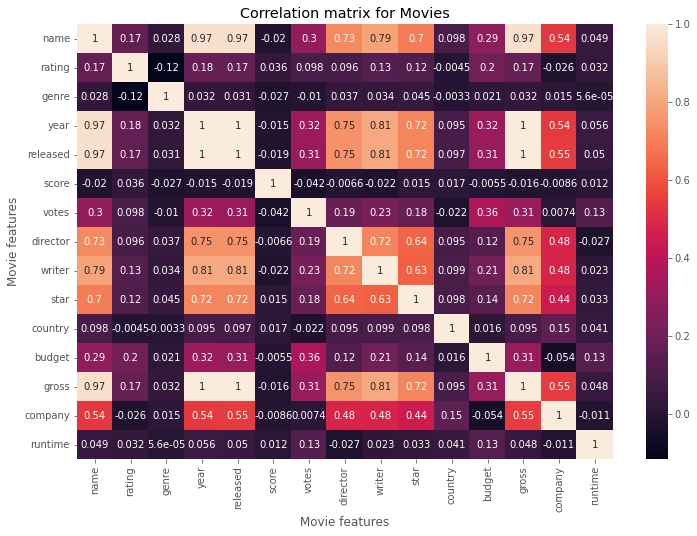

In [ ]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [ ]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

name     name        1.000000
         rating      0.169808
         genre       0.028413
         year        0.965461
         released    0.966086
                       ...   
runtime  country     0.040813
         budget      0.134894
         gross       0.047728
         company    -0.010695
         runtime     1.000000
Length: 225, dtype: float64


In [ ]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

rating   genre     -0.116507
genre    rating    -0.116507
budget   company   -0.053573
company  budget    -0.053573
score    votes     -0.041981
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64


In [ ]:
# We can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

company  name       0.535369
name     company    0.535369
company  year       0.537731
year     company    0.537731
gross    company    0.545924
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 65, dtype: float64


In [ ]:
# Looking at the top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 54610959970
Universal Pictures           51241105418
Columbia Pictures            42356430218
Paramount Pictures           40021704691
Twentieth Century Fox        39542573303
Walt Disney Pictures         35833650748
New Line Cinema              19612851164
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Dreamworks Pictures          11593807697
Touchstone Pictures          10664679494
Metro-Goldwyn-Mayer (MGM)     8937010092
Summit Entertainment          8318570396
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7243673721
Name: gross, dtype: int64

In [ ]:
# Getting the year of film release

df['Year'] = df['released'].astype(str).str[:4]
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,June
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,July
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,June
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,July
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0,Janu
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0,Febr
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0,Janu
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0,Febr


In [ ]:
df.groupby(['company', 'year'])[["gross"]].sum()

gross
company                             year             
"DIA" Productions GmbH & Co. KG     2003   44350926.0
"Weathering With You" Film Partners 2019  193457467.0
.406 Production                     1996      10580.0
1492 Pictures                       1996  129832389.0
                                    1999   87423861.0
...                                               ...
erbp                                2013     587174.0
i am OTHER                          2015   17986781.0
i5 Films                            2001   10031529.0
micro_scope                         2010    7099598.0
thefyzz                             2017   62198461.0

[2987 rows x 1 columns]

In [ ]:
CompanyGrossSum = df.groupby(['company', 'year'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company','year'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company                year
Walt Disney Pictures   2019    5773131804
Marvel Studios         2018    4018631866
Universal Pictures     2015    3834354888
Twentieth Century Fox  2009    3793491246
Walt Disney Pictures   2017    3789382071
Paramount Pictures     2011    3565705182
Warner Bros.           2011    3223799224
Walt Disney Pictures   2010    3104474158
Paramount Pictures     2014    3071298586
Columbia Pictures      2006    2934631933
                       2019    2932757449
Marvel Studios         2019    2797501328
Warner Bros.           2018    2774168962
Columbia Pictures      2011    2738363306
Warner Bros.           2005    2688767210
Name: gross, dtype: int64

In [ ]:
CompanyGrossSum = df.groupby(['company'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 54610959970
Universal Pictures           51241105418
Columbia Pictures            42356430218
Paramount Pictures           40021704691
Twentieth Century Fox        39542573303
Walt Disney Pictures         35833650748
New Line Cinema              19612851164
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Dreamworks Pictures          11593807697
Touchstone Pictures          10664679494
Metro-Goldwyn-Mayer (MGM)     8937010092
Summit Entertainment          8318570396
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7243673721
Name: gross, dtype: int64

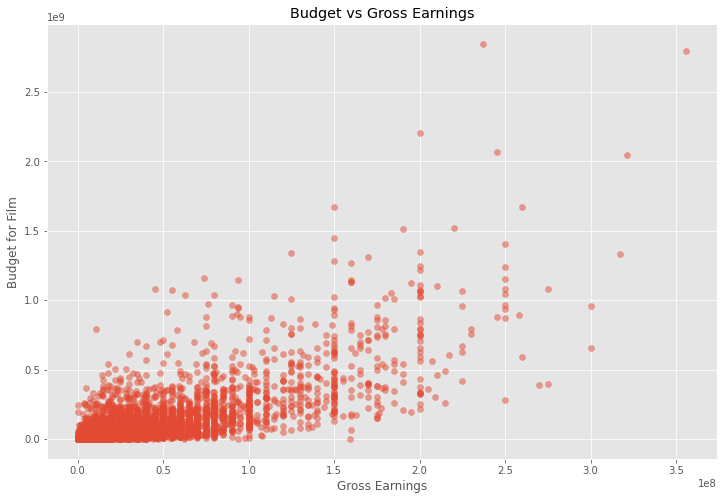

In [ ]:
plt.scatter(x=df['budget'], y=df['gross'], alpha=0.5)
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

In [ ]:
df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year
0,4692,6,6,1980,1304,8.4,927000.0,1795,2832,699,46,19000000.0,46998772.0,1426,146.0,11
1,3929,6,1,1980,1127,5.8,65000.0,1578,1158,214,47,4500000.0,58853106.0,452,104.0,10
2,3641,4,0,1980,1359,8.7,1200000.0,757,1818,1157,47,18000000.0,538375067.0,945,124.0,11
3,204,4,4,1980,1127,7.7,221000.0,889,1413,1474,47,3500000.0,83453539.0,1108,88.0,10
4,732,6,4,1980,1170,7.3,108000.0,719,351,271,47,6000000.0,39846344.0,1083,98.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,415,6,0,2020,904,6.6,140000.0,16,2390,1812,47,90000000.0,426505244.0,452,124.0,9
7649,3556,4,0,2020,713,6.5,102000.0,852,2309,147,47,85000000.0,319715683.0,1108,99.0,8
7650,1153,4,1,2020,904,5.6,53000.0,1809,2827,1470,47,175000000.0,245487753.0,1397,101.0,9
7651,3978,4,1,2020,758,6.8,42000.0,294,2091,640,6,135000000.0,111105497.0,12,100.0,8


In [ ]:
df_numerized.corr(method='pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year
name,1.000000,-0.029234,0.010996,0.025542,-0.006152,0.014450,0.012615,0.015246,0.012880,-0.006882,-0.025490,0.023392,0.005639,0.021697,0.010850,-0.007371
rating,-0.029234,1.000000,0.147796,0.019499,0.018083,0.065983,0.006031,0.014656,-0.003149,0.009196,0.008230,-0.203946,-0.181906,-0.092357,0.140792,0.015532
genre,0.010996,0.147796,1.000000,-0.073167,0.022142,0.035106,-0.135990,-0.008553,0.017578,0.003341,-0.009164,-0.368523,-0.244101,-0.071334,-0.059237,0.021306
year,0.025542,0.019499,-0.073167,1.000000,-0.001740,0.056386,0.206021,-0.038354,-0.025908,-0.032157,-0.066748,0.327722,0.274321,-0.014333,0.075077,-0.005073
released,-0.006152,0.018083,0.022142,-0.001740,1.000000,0.045874,0.028833,0.002308,0.008072,0.015706,-0.017228,0.019952,0.008501,-0.002407,0.008975,0.996181
score,0.014450,0.065983,0.035106,0.056386,0.045874,1.000000,0.474256,0.005413,0.012843,0.007296,-0.043051,0.072001,0.222556,0.020656,0.414068,0.045136
votes,0.012615,0.006031,-0.135990,0.206021,0.028833,0.474256,1.000000,-0.010376,-0.005316,-0.017638,0.041551,0.439675,0.614751,0.118470,0.352303,0.027535
director,0.015246,0.014656,-0.008553,-0.038354,0.002308,0.005413,-0.010376,1.000000,0.261735,0.036593,0.011133,-0.009662,-0.029560,-0.008223,0.017433,0.003497
writer,0.012880,-0.003149,0.017578,-0.025908,0.008072,0.012843,-0.005316,0.261735,1.000000,0.018520,0.022488,-0.039466,-0.035885,-0.003697,-0.017561,0.007594
star,-0.006882,0.009196,0.003341,-0.032157,0.015706,0.007296,-0.017638,0.036593,0.018520,1.000000,-0.009990,-0.021473,-0.000004,0.014082,0.010108,0.014919


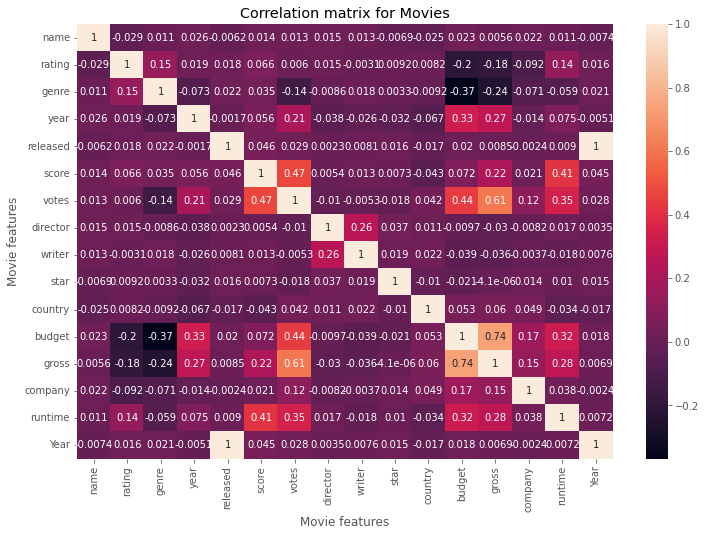

In [ ]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

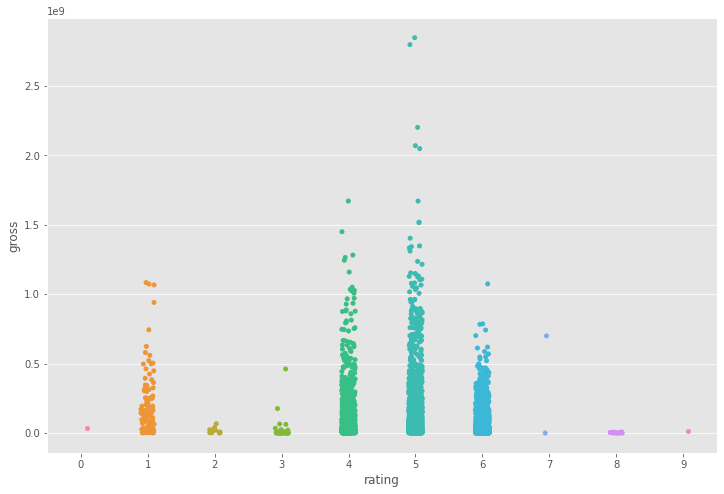

In [ ]:
sns.stripplot(x="rating", y="gross", data=df)